# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
#!pip list
#!pip freeze > requirements.txt

In [328]:
# https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/code

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [330]:
#Type your code here
df = pd.read_csv('bank_transactions_data_2.csv')
#df = pd.read_csv('https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/code')
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [331]:
df.shape

(2512, 16)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [333]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [334]:
df.duplicated().sum()

np.int64(0)

In [335]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>],
       [<Axes: title={'center': 'AccountBalance'}>, <Axes: >]],
      dtype=object)

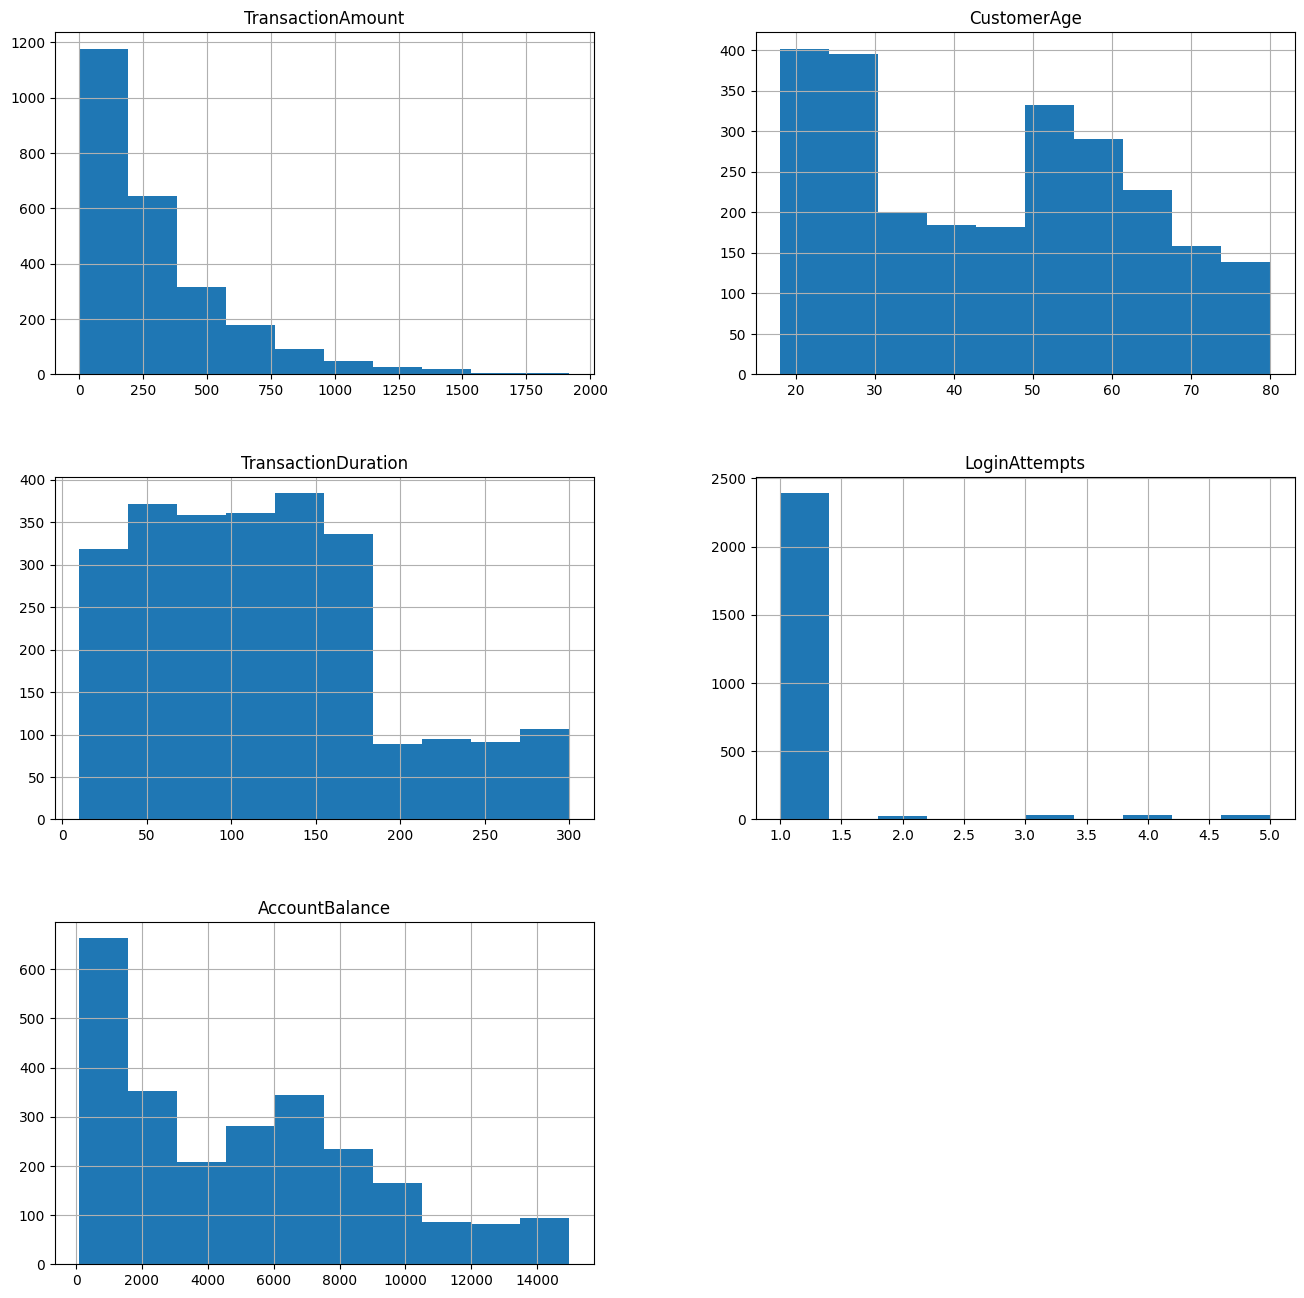

In [336]:
df.hist(figsize=(16,16))

In [337]:


# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)




Numerical Columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Categorical Columns: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


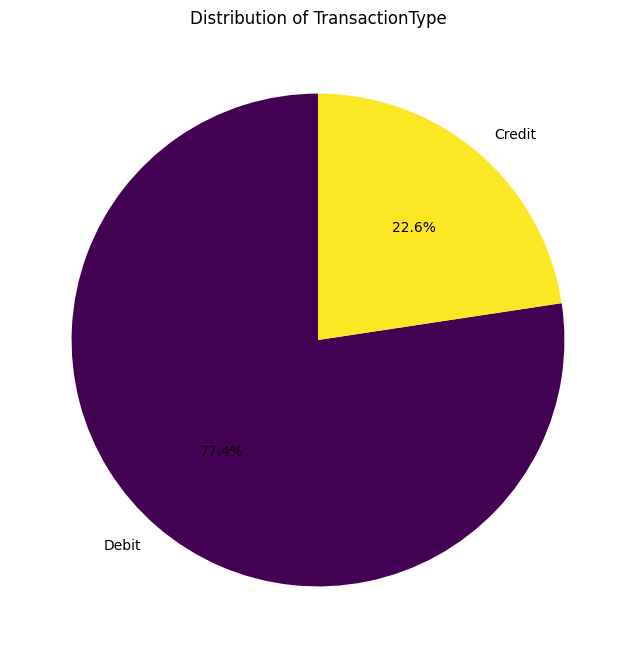

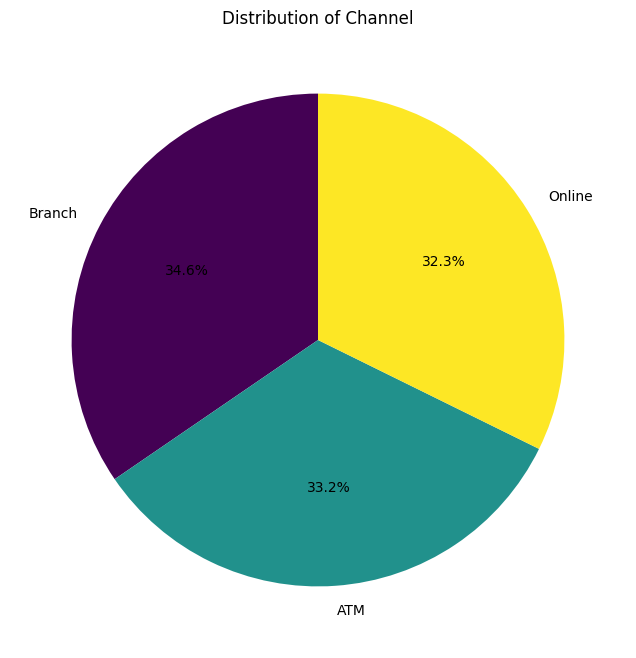

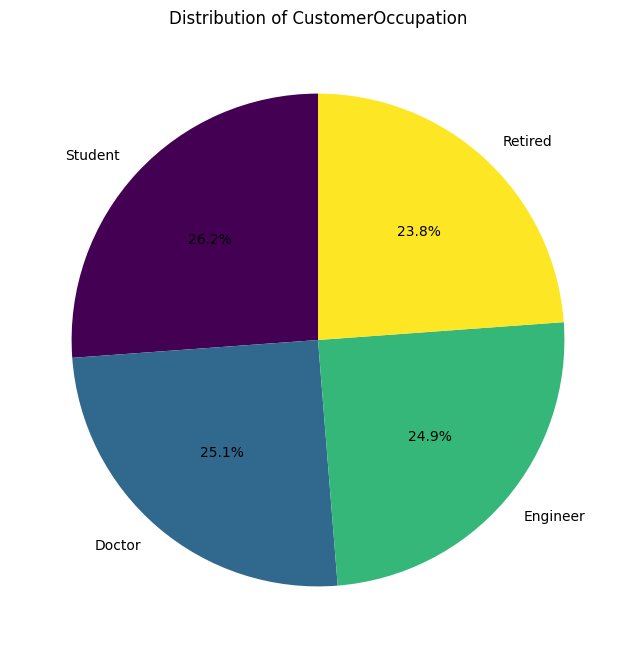

In [338]:
# Plot the distribution of categorical columns as pie charts
categorical_columns = ['TransactionType', 'Channel', 'CustomerOccupation']
for column in categorical_columns:
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Distribution of {column}')
    plt.ylabel('')  # Hide the y-label
    plt.show()


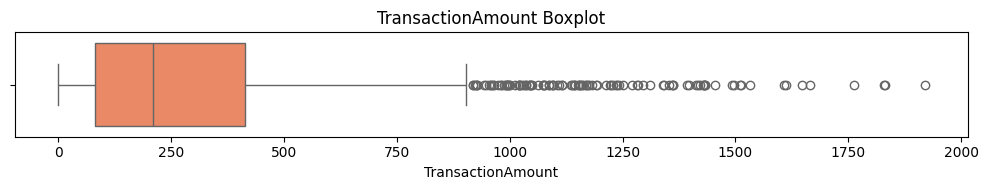


Summary Statistics for TransactionAmount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


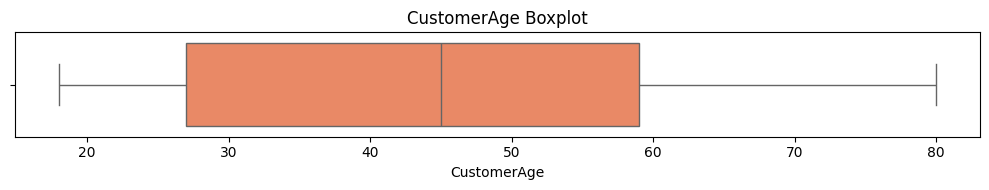


Summary Statistics for CustomerAge:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


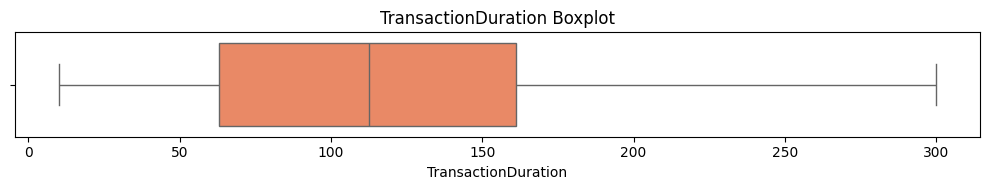


Summary Statistics for TransactionDuration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


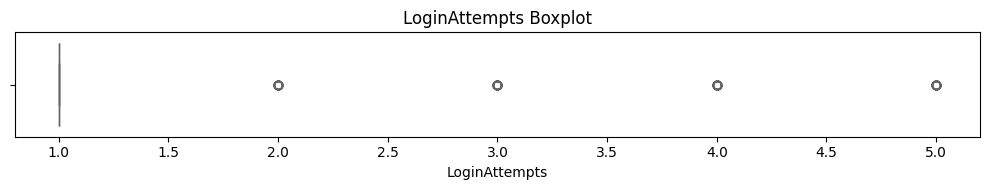


Summary Statistics for LoginAttempts:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


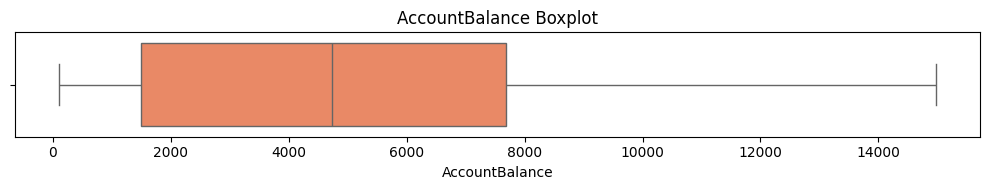


Summary Statistics for AccountBalance:
 count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64


In [339]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    # Create a boxplot with the specified color
    sns.boxplot(x=data[column], color='coral')  
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    # Print summary statistics for the specified column
    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

for column in numerical_columns:
    univariate_analysis(df, column, column.replace('_', ' '))



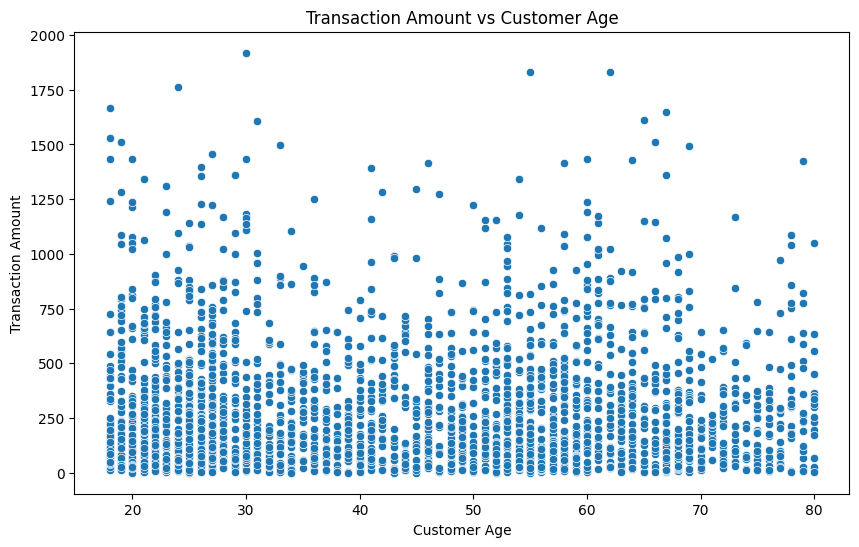

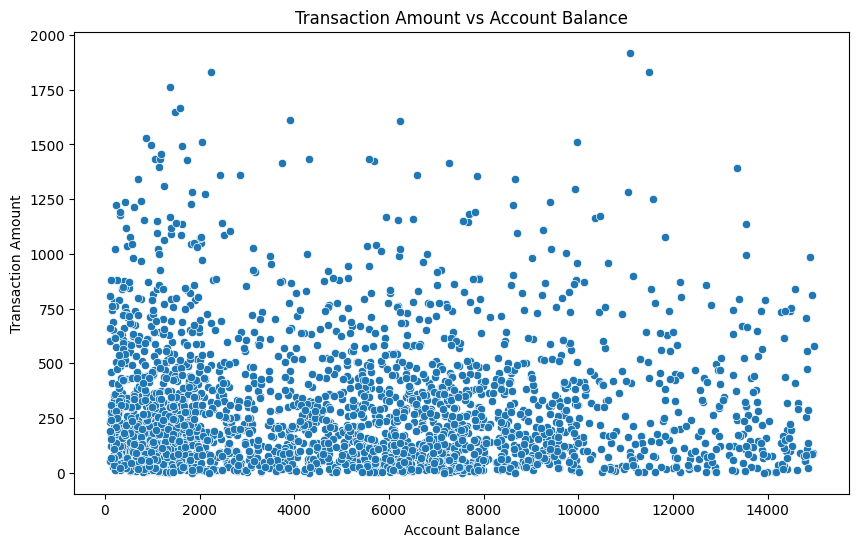

In [340]:
# 1. Analyze the relationship between TransactionAmount and CustomerAge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CustomerAge', y='TransactionAmount', data=df)
plt.title('Transaction Amount vs Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Transaction Amount')
plt.show()

# 2. Analyze the relationship between TransactionAmount and AccountBalance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AccountBalance', y='TransactionAmount', data=df)
plt.title('Transaction Amount vs Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.show()



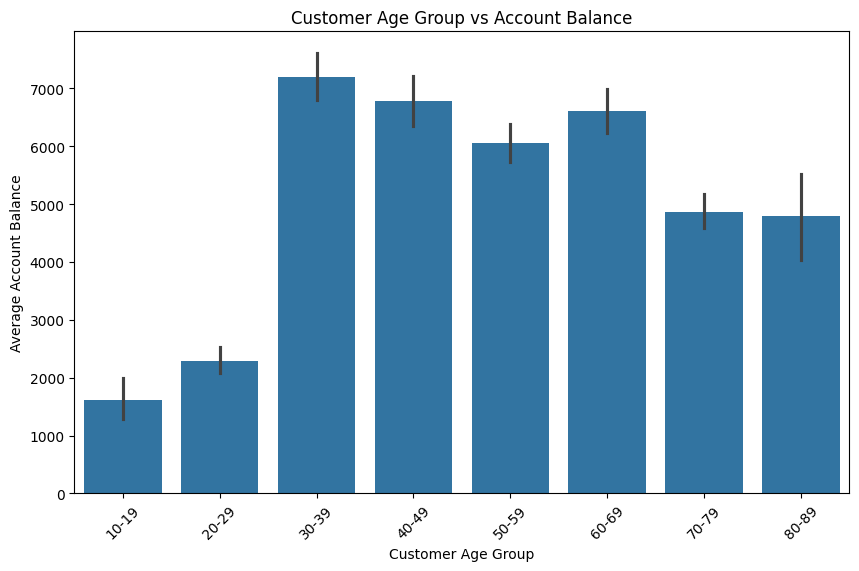

In [341]:
# Group the age into bins of 10 years
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=range(10, 91, 10), right=False, labels=[f'{i}-{i+9}' for i in range(10, 90, 10)])

plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='AccountBalance', data=df, estimator=np.mean)
plt.title('Customer Age Group vs Account Balance')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Account Balance')
plt.xticks(rotation=45)
plt.show()

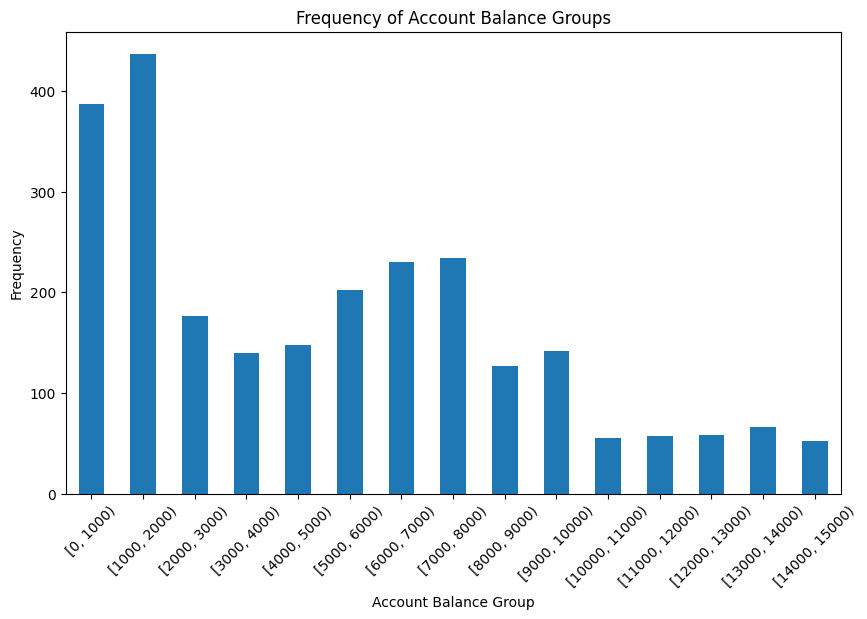

In [342]:
# Define the bins for AccountBalance
bins = range(0, int(df['AccountBalance'].max()) + 1000, 1000)

# Create a new column 'BalanceGroup' with the bins
df['BalanceGroup'] = pd.cut(df['AccountBalance'], bins=bins, right=False)

# Calculate the frequency of each bin
balance_group_frequency = df['BalanceGroup'].value_counts().sort_index()

# Display the frequency
plt.figure(figsize=(10, 6))
balance_group_frequency.plot(kind='bar')
plt.title('Frequency of Account Balance Groups')
plt.xlabel('Account Balance Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


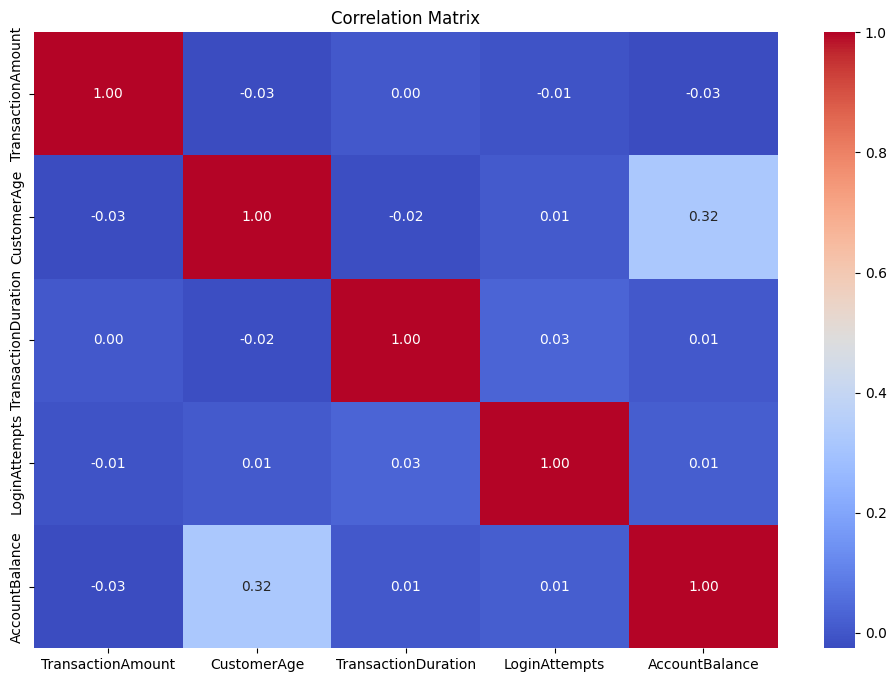

In [343]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [344]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
df = df.dropna()

In [345]:
# 2. Menghapus Data Duplikat
df = df.drop_duplicates()

In [346]:
# 3. Normalisasi atau Standarisasi Fitur

scaler = StandardScaler()
numeric_columns = ['TransactionAmount', 'AccountBalance']
x = df[numeric_columns].copy()
x_scaled = scaler.fit_transform(x)

In [347]:
x_scaled.shape

(2512, 2)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [348]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
K = range(1, 10)  # Test for clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

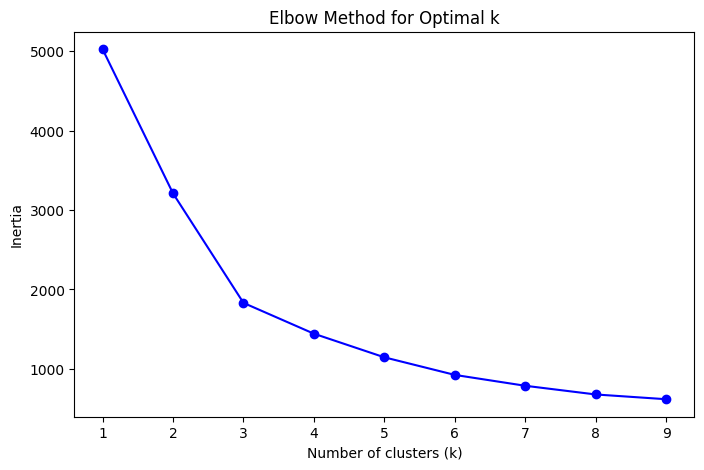

In [349]:


# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [350]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

# Elbow Method
sse = []
silhouette_scores = []
cluster_range = range(2, 11)

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(x_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f'Sillhouette Score: {silhouette_avg} for {num_clusters} clusters')

Sillhouette Score: 0.38506384769867624 for 2 clusters
Sillhouette Score: 0.4435209934570755 for 3 clusters
Sillhouette Score: 0.4273725032120542 for 4 clusters
Sillhouette Score: 0.4110374990987826 for 5 clusters
Sillhouette Score: 0.41695024347156223 for 6 clusters
Sillhouette Score: 0.42747585095771407 for 7 clusters
Sillhouette Score: 0.39381145959732067 for 8 clusters
Sillhouette Score: 0.39755715330345315 for 9 clusters
Sillhouette Score: 0.3998651738168466 for 10 clusters


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
pca = PCA(n_components=2)
pca_components = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
pca_df['Cluster'] = kmeans.fit_predict(pca_components)

In [362]:
for num_clusters in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=num_clusters)
    labels = clustering.fit_predict(pca_components)
    silhouette_avg = silhouette_score(pca_components, labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Silhouette Score: {silhouette_avg} for {num_clusters} clusters')

Silhouette Score: 0.4544554420508011 for 2 clusters
Silhouette Score: 0.42609991819887116 for 3 clusters
Silhouette Score: 0.38231085546198207 for 4 clusters
Silhouette Score: 0.38238683902059073 for 5 clusters
Silhouette Score: 0.37302364036650865 for 6 clusters
Silhouette Score: 0.3761854141221331 for 7 clusters
Silhouette Score: 0.3467159411027741 for 8 clusters
Silhouette Score: 0.3399439277448727 for 9 clusters
Silhouette Score: 0.34077764777815694 for 10 clusters


In [ ]:

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(x_scaled)

# calculate silhouette score
silhouette_avg = silhouette_score(x_scaled, hierarchical_labels)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_avg}')

Silhouette Score for Agglomerative Clustering: 0.42609991819887116


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [354]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [355]:
# Fit K-means with the chosen number of clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_scaled)

# Assign clusters and calculate distance to cluster centroid
df['Cluster'] = kmeans.labels_
df['DistanceToCentroid'] = np.linalg.norm(x_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify potential frauds based on distance threshold
threshold = df['DistanceToCentroid'].quantile(0.95)
potential_frauds = df[df['DistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

Number of potential frauds detected: 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,BalanceGroup,Cluster,DistanceToCentroid
34,TX000035,AC00365,255.26,2023-10-27 16:42:49,Credit,San Francisco,D000357,92.214.76.157,M002,Branch,45,Doctor,50,1,14815.87,2024-11-04 08:10:51,40-49,"[14000, 15000)",0,1.518537
41,TX000042,AC00480,34.02,2023-01-09 16:13:21,Debit,Philadelphia,D000627,109.105.179.186,M046,Online,38,Doctor,19,1,14214.48,2024-11-04 08:11:45,30-39,"[14000, 15000)",0,1.489150
52,TX000053,AC00115,85.43,2023-06-07 16:45:34,Debit,Virginia Beach,D000235,194.174.252.1,M078,Branch,67,Doctor,145,1,14904.90,2024-11-04 08:06:45,60-69,"[14000, 15000)",0,1.595224
64,TX000065,AC00434,5.77,2023-11-02 16:01:40,Debit,Charlotte,D000461,155.164.18.235,M071,Online,50,Doctor,124,1,13988.12,2024-11-04 08:11:32,50-59,"[13000, 14000)",0,1.480306
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,20,Student,24,1,605.95,2024-11-04 08:06:51,20-29,"[0, 1000)",2,1.551350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,TX002355,AC00282,959.48,2023-01-10 16:28:02,Debit,Miami,D000120,90.111.245.138,M004,Branch,67,Doctor,36,1,10631.43,2024-11-04 08:07:57,60-69,"[10000, 11000)",2,1.684408
2380,TX002381,AC00098,1173.74,2023-09-25 16:44:52,Credit,Virginia Beach,D000639,193.190.29.63,M086,Online,61,Doctor,61,1,10456.24,2024-11-04 08:07:31,60-69,"[10000, 11000)",2,1.944834
2403,TX002404,AC00111,1493.00,2023-06-07 17:05:41,Debit,Colorado Springs,D000344,136.162.111.135,M096,ATM,69,Retired,151,1,1619.16,2024-11-04 08:07:07,60-69,"[1000, 2000)",2,2.302945
2414,TX002415,AC00028,1664.33,2023-09-25 17:11:19,Debit,San Antonio,D000072,116.106.207.139,M064,Branch,18,Student,65,1,1588.31,2024-11-04 08:07:07,10-19,"[1000, 2000)",2,2.871540


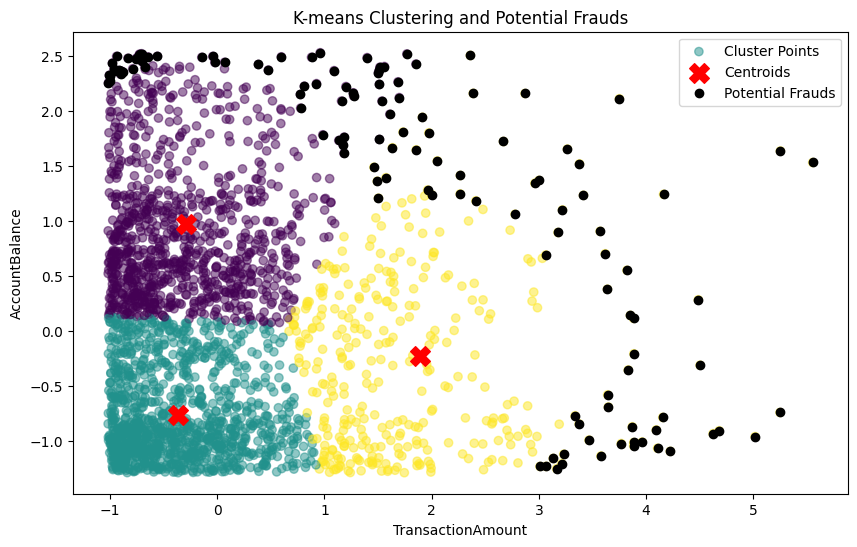

In [356]:
# Visualize clusters and potential frauds (2D plot for simplicity with legend)
plt.figure(figsize=(10, 6))

# Plotting clusters
scatter = plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Cluster Points')

# Plotting cluster centroids
centroids = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Plotting potential frauds
frauds = plt.scatter(x_scaled[potential_frauds.index, 0], x_scaled[potential_frauds.index, 1], c='black', label='Potential Frauds', edgecolors='k')

plt.xlabel(numeric_columns[0])
plt.ylabel(numeric_columns[1])
plt.title('K-means Clustering and Potential Frauds')
plt.legend(loc='upper right')
plt.show()

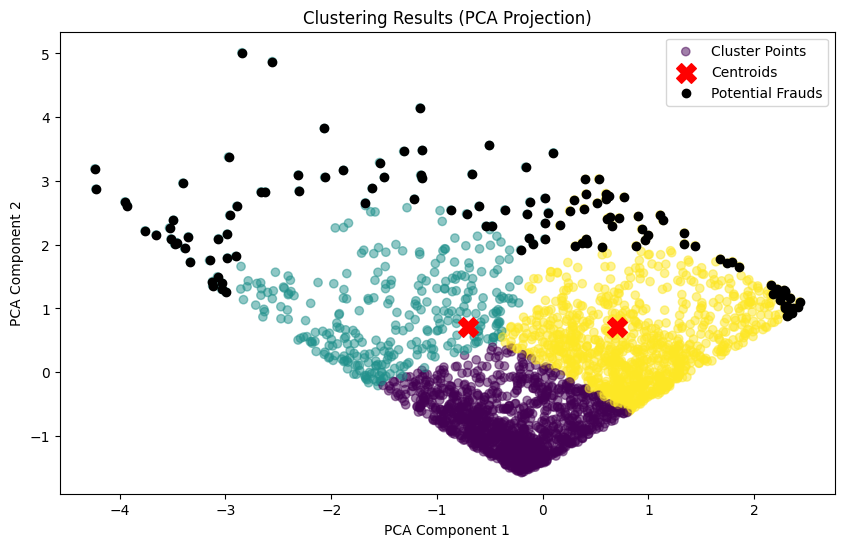

In [357]:
# Plot the PCA components with cluster labels and potential frauds
plt.figure(figsize=(10, 6))

# Plotting clusters
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5, label='Cluster Points')

# Plotting cluster centroids
centroids = plt.scatter(pca.components_[:, 0], pca.components_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Plotting potential frauds
frauds = plt.scatter(pca_df.loc[potential_frauds.index, 'PCA1'], pca_df.loc[potential_frauds.index, 'PCA2'], c='black', label='Potential Frauds', edgecolors='k')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results (PCA Projection)')
plt.legend(loc='upper right')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [358]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.